# Problem Definition

You own the mall and want to understand the customers like who can be easily converge <br>
[Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly

# Content
You are owing a supermarket mall and through membership cards , you have some basic data about your <br>
customers like Customer ID, age, gender, annual income and spending score. <br>
Spending Score is something you assign to the customer based on your defined parameters like <br>
customer behavior and purchasing data.

# Data
The data is available on [Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

The dataset consists of 5 attributes namely :
* CustomerID
* Gender
* Age
* Annual Income (k$)
* Spending Score (1-100)

In [58]:
# EDA libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estimators and Metrics
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
sns.set_style("darkgrid")

In [66]:
%matplotlib inline

In [4]:
#Import data
dataset = pd.read_csv("data/Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no null values in the dataset

In [9]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Renaming the `Genre` Column

In [14]:
data_new = dataset.copy()
data_new.rename(columns = {"Genre" : "Gender"}, inplace = True)
data_new

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Converting categorical `Gender` values to numeric

In [ ]:
data_new["Gender"] = data_new["Gender"].replace({"Male" : 0, "Female" : 1} 

In [25]:
data_new.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


# Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

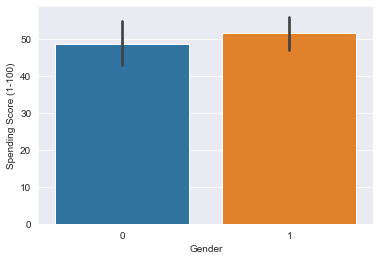

In [27]:
sns.barplot(x = "Gender" , y = "Spending Score (1-100)", data = data_new)

<AxesSubplot:xlabel='Spending Score (1-100)'>

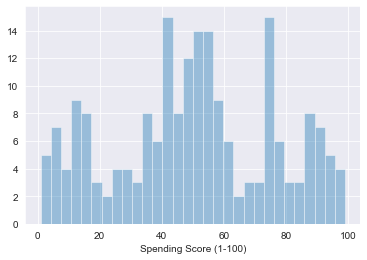

In [39]:
sns.distplot(data_new["Spending Score (1-100)"], bins = 30, kde = False)

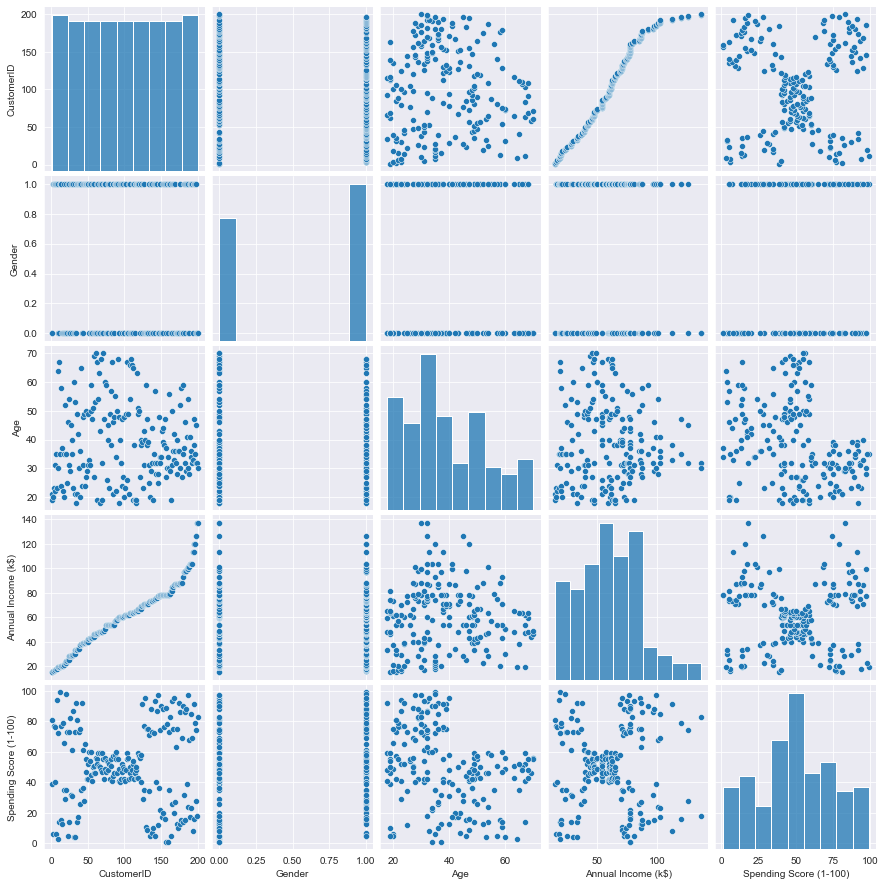

In [43]:
sns.pairplot(data = data_new)

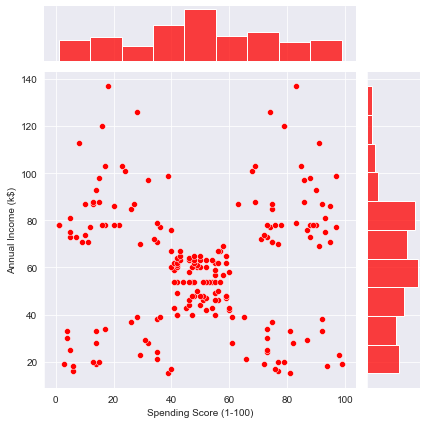

In [48]:
sns.jointplot(x = "Spending Score (1-100)", y = "Annual Income (k$)", data = data_new, color = "red")

From the jointplot we can see the data points have formed 5 clusters 

In [53]:
#Selecting important features 
X = data_new[["Annual Income (k$)", "Spending Score (1-100)"]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Data Preprocessing

In [59]:
np.random.RandomState(42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
scaled_features[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

## Machine Learning

### We will use K-Means Clustering

Here are the parameters used: 

* **init** controls the initialization technique. The standard version of the k-means algorithm is implemented by setting init to "random". Setting this to "k-means++" employs an advanced trick to speed up convergence, which you’ll use later.

* **n_clusters** sets k for the clustering step. This is the most important parameter for k-means.

* **n_init** sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.

* **max_iter** sets the number of maximum iterations for each initialization of the k-means algorithm.

In [61]:
kmeans = KMeans(
        init="random",
        n_clusters=5,
        n_init=10,
        max_iter=300,
        random_state = 42 )

#Fit kmeans to our scaled features
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=5, random_state=42)

In [62]:
#Lowest SSE(Sum of Squared Error) value 
print("kmeans.inertia_)

65.56840815571681

In [63]:
#Final locations of the centroid
kmeans.cluster_centers_

array([[-1.30751869, -1.13696536],
       [-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907]])

In [64]:
# The number of iterations required to converge
kmeans.n_iter_

12

# Choosing the Appropriate Number of Clusters
We will look at two methods commonly used to evaluate clusters

* The elbow method
* The silhouette coefficient

### Elbow Method

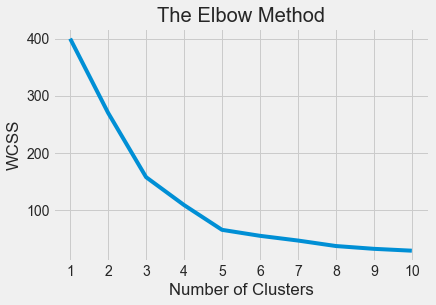

In [73]:
#finding the optimal number of clusters 

# We will use `k-means++` as our init for faster convergence
wcss = [ ] #Within Cluster Sum of Squares
for i in range(1, 11):
    kmeans2 = KMeans(init="k-means++", n_clusters=i, n_init=10, max_iter=300, random_state = 42)
    kmeans2.fit(scaled_features)
    wcss.append(kmeans2.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("The Elbow Method");

`From our plot we can see that our elbow point is at 5`

Sometimes finding the elbow point in the SSE curve may not be straight <br>
You can use the python package called [kneed](https://github.com/arvkevi/kneed)
which will help you find it programmatically 

In [69]:
#Using the KneeLocator
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

5

### The silhouette coefficient
The silhouette coefficient is a measure of cluster cohesion and separation. <br>
It quantifies how well a data point fits into its assigned cluster based on two factors:

* How close the data point is to other points in the cluster
* How far away the data point is from points in other clusters

* Silhouette coefficient values range between -1 and 1. <br>


* Larger numbers indicate that samples are closer to their clusters than they are to other clusters


In the scikit-learn [implementation of the silhouette coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html), <br>
the average silhouette coefficient of all the samples is summarized into one score. <br>
The silhouette score() function needs a minimum of two clusters, or it will raise an exception. <br>

Loop through values of k again. This time, instead of computing SSE, compute the silhouette coefficient:



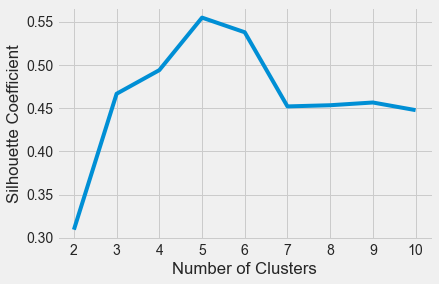

In [74]:
 # A list holds the silhouette coefficients for each k
silhouette_coefficients = []

 # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(init = "k-means++", n_clusters=k, n_init=10, max_iter=300, random_state = 42)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show() 

In [87]:
# Making predictions 
kmeans = KMeans(init = "k-means++", n_clusters=5, n_init=10, max_iter=300, random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_features)
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 1, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

0, 1, 2, 3, 4 corresponds to 1st, 2nd, 3rd, 4th, and 5th cluster respectively 

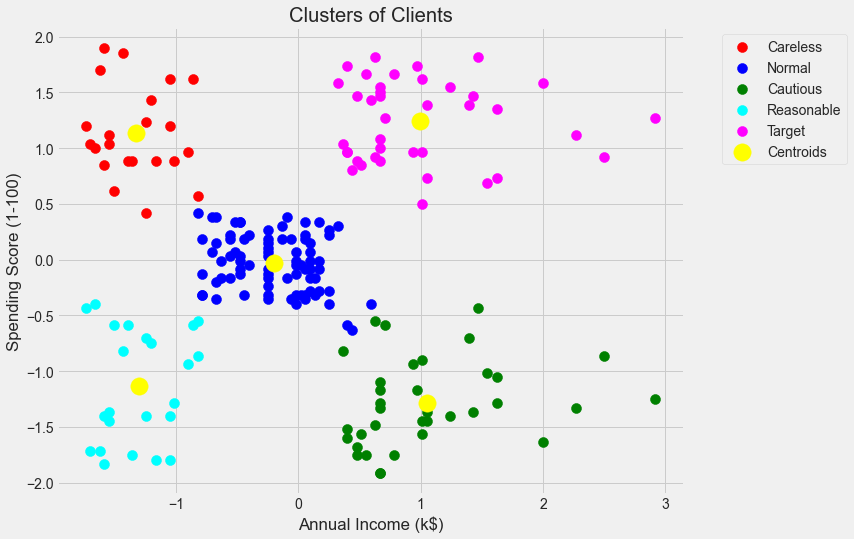

In [96]:
# Visualising the clusters 
plt.figure(figsize = (10,8))
plt.scatter(scaled_features[y_kmeans==0, 0], scaled_features[y_kmeans==0, 1], s = 100, c ="red", label = "Careless")
plt.scatter(scaled_features[y_kmeans==1, 0], scaled_features[y_kmeans==1, 1], s = 100, c ="blue", label = "Normal")
plt.scatter(scaled_features[y_kmeans==2, 0], scaled_features[y_kmeans==2, 1], s = 100, c ="green", label = "Cautious")
plt.scatter(scaled_features[y_kmeans==3, 0], scaled_features[y_kmeans==3, 1], s = 100, c = "cyan", label = "Reasonable")
plt.scatter(scaled_features[y_kmeans==4, 0], scaled_features[y_kmeans==4, 1], s = 100, c = "magenta", label = "Target")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = "yellow", label = "Centroids")
plt.title("Clusters of Clients")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(loc = "upper left", bbox_to_anchor=(1.05, 1));

### Intuition
From our plot we have five clusters :

* Those with low income and low spending score(Reasonable)
* Those with average income and average spending score(Normal)
* Those with high income but low spending score(Cautious)
* Customers with high income and high spending score(Target)
* Others with Low income but high spending scoring(Careless)

Our most important customers are those labelled `Target` because they spend much <br>
and contribute much to our company. We have to retain them.
We can retain them by:
1. #### Set Customer expectations
We must know what those customers expects from us. This will help build trust and put <br>
their mind at ease. This can also be stressed by setting lower expectations for <br>
ourselves than what we feel we can provide

2. #### Set up constant contact to retain customers
One of the ways we can build relationships with these customers is by consistent communication. <br>
This can be done by setting up a programmed series of phone calls, emails, special offers, <br>
a thoughtful card, and more.
* We can give those customers local cards like Prepaid Visa card or a Custom Mastercard gift card


Another set of customers are those labelled `Cautious`
They are those with high income but spend less. <br>
What we can do is find a way to increase the customers' satisfication rate 

* Offer customers deals that makes them spend more. For example, <br>
“Get 3 for the price of 2,” bonuses will make them spend much more.


We can strategize myriad of ways to retain other customers and make them spend more.

## References

* [Kneed Implementation](https://github.com/arvkevi/kneed)
* [sklearn.metrics.silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)
* [10 Ways to Increase Average Consumer Spending Per Visit](https://brandongaille.com/10-ways-to-increase-average-consumer-spending-per-visit/)